# Task 1: Acquire, preprocess, and analyze the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hepatitis dataset

Acquiring and preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

hepa = pd.read_csv('drive/MyDrive/COMP551p1/hepatitis.csv', header = None)
hepa.columns = ['class','age','sex','steroid','antivirals','fatigue','malaise',
              'anorexia','liver_big','liver_firm','spleen_palpable','spiders',
              'ascites','varices','bilirubin','alk_phosphate','sgot','albumin',
              'protime','histology']
hepa = hepa.replace(to_replace = '?', value = np.nan) # replace '?' to NaN value.
hepa

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
hepa.isna().sum(axis=0) # see how many missing values for each features.

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [ ]:
hepa.isna().mean() # see the percentation of missing values for each features.

class              0.000000
age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
dtype: float64

In [ ]:
hepa = hepa.fillna(hepa.median())
hepa

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61.0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61.0,1
3,2,31,1,2.0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,200,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85.0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61.0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61.0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [ ]:
hepa.info() # see data type for each features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

In [ ]:
# change data type to numerical data.
hepa[['steroid','fatigue','malaise','anorexia','liver_big','liver_firm',
      'spleen_palpable','spiders','ascites','varices','alk_phosphate','sgot',
      'protime']] = hepa[['steroid','fatigue','malaise','anorexia','liver_big',
                          'liver_firm','spleen_palpable','spiders','ascites',
                          'varices','alk_phosphate','sgot','protime']].astype('int')
# change 1 to 0 and change 2 to 1.
hepa = hepa.replace(to_replace = 1, value = 0)
hepa = hepa.replace(to_replace = 2, value = 1)
hepa[['bilirubin','albumin']] = hepa[['bilirubin','albumin']].astype('float')
hepa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

summary of continuous numerical fetures

In [ ]:
hepa[['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']].describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.372258,101.522581,85.174194,3.836129,61.483871
std,12.565878,1.219992,47.082042,88.590122,0.619267,17.198745
min,7.000000,0.000000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.700000,78.000000,32.500000,3.500000,57.000000
50%,39.000000,1.000000,85.000000,58.000000,4.000000,61.000000
75%,50.000000,1.500000,119.500000,99.000000,4.200000,65.000000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


## **Label: Class**

Text(0.5, 1.0, 'pie chart for label class')

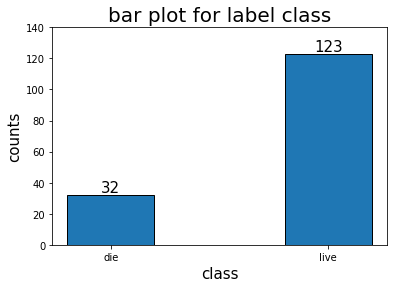

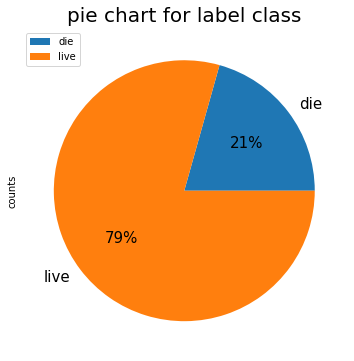

In [ ]:
# bar chart
hepa['class'].value_counts()
x_h = ['die', 'live']
y_h = [32, 123]
plt.bar(x_h,y_h, width=0.4, ec='black')
plt.xlabel('class', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.text(0, y_h[0], 32, ha='center', va='bottom', fontsize=15)
plt.text(1,y_h[1], 123, ha='center', va='bottom', fontsize=15)
plt.ylim([0,140])
plt.title('bar plot for label class', fontsize=20)
# pie chart
hepa_class_df = pd.DataFrame({'class':['die', 'live'], 'counts':[32, 123]})
hepa_class_df.groupby(['class']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%',figsize=(8,6), fontsize=15)
plt.title('pie chart for label class', fontsize=20)

## **Descriptive Features**



*   Numerical features: (age, bilirubin, alk_phosphate, sgot, albumin, protime)



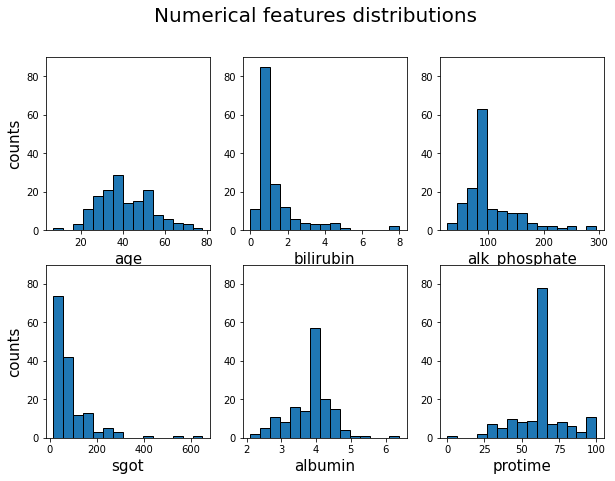

<Figure size 1296x864 with 0 Axes>

In [ ]:
# hepa['age'].value_counts()
# hepa['bilirubin'].value_counts()
# hepa['alk_phosphate'].value_counts()
# hepa['sgot'].value_counts()
# hepa['albumin'].value_counts()
# hepa['protime'].value_counts()
figure, axis = plt.subplots(2, 3, figsize=(10,7))
plt.figure(figsize=(18,12))
axis[0, 0].hist(hepa['age'], bins=15, edgecolor='black')
axis[0, 0].set_xlabel('age', fontsize=15)
axis[0, 0].set_ylabel('counts',fontsize=15)
axis[0, 0].set_ylim([0,90])

axis[0, 1].hist(hepa['bilirubin'], bins=15, edgecolor='black')
axis[0, 1].set_xlabel('bilirubin',fontsize=15)
axis[0, 1].set_ylim([0,90])

axis[0, 2].hist(hepa['alk_phosphate'], bins=15, edgecolor='black')
axis[0, 2].set_xlabel('alk_phosphate',fontsize=15)
axis[0, 2].set_ylim([0,90])

axis[1, 0].hist(hepa['sgot'], bins=15, edgecolor='black')
axis[1, 0].set_xlabel('sgot',fontsize=15)
axis[1, 0].set_ylabel('counts',fontsize=15)
axis[1, 0].set_ylim([0,90])

axis[1, 1].hist(hepa['albumin'], bins=15, edgecolor='black')
axis[1, 1].set_xlabel('albumin',fontsize=15)
axis[1, 1].set_ylim([0,90])

axis[1, 2].hist(hepa['protime'], bins=15, edgecolor='black')
axis[1, 2].set_xlabel('protime',fontsize=15)
axis[1, 2].set_ylim([0,90])

figure.suptitle('Numerical features distributions', fontsize=20)
plt.tight_layout()
plt.show()

0    139
1     16
Name: sex, dtype: int64

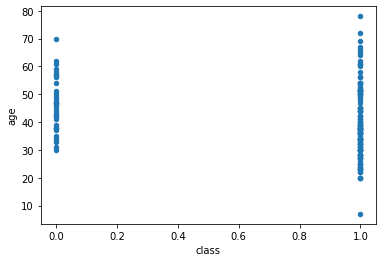

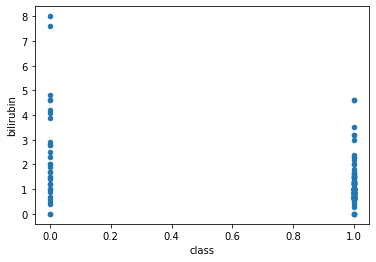

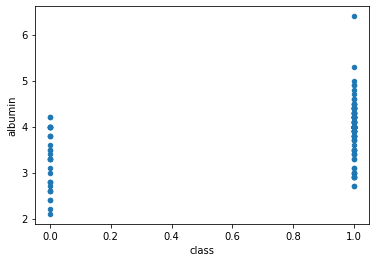

In [ ]:
age_class = pd.DataFrame(hepa[['age', 'class']])
age_class.plot.scatter(x='class', y='age')
bilirubin_class = pd.DataFrame(hepa[['bilirubin', 'class']])
bilirubin_class.plot.scatter(x='class', y='bilirubin')
alk_class =pd.DataFrame(hepa[['alk_phosphate', 'class']])
alk_class.plot
albumin_class = pd.DataFrame(hepa[['albumin', 'class']])
albumin_class.plot.scatter(x='class', y='albumin')
hepa['sex'].value_counts()




*   Categorical festures: (sex, steroid, antiviral, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, hisology)



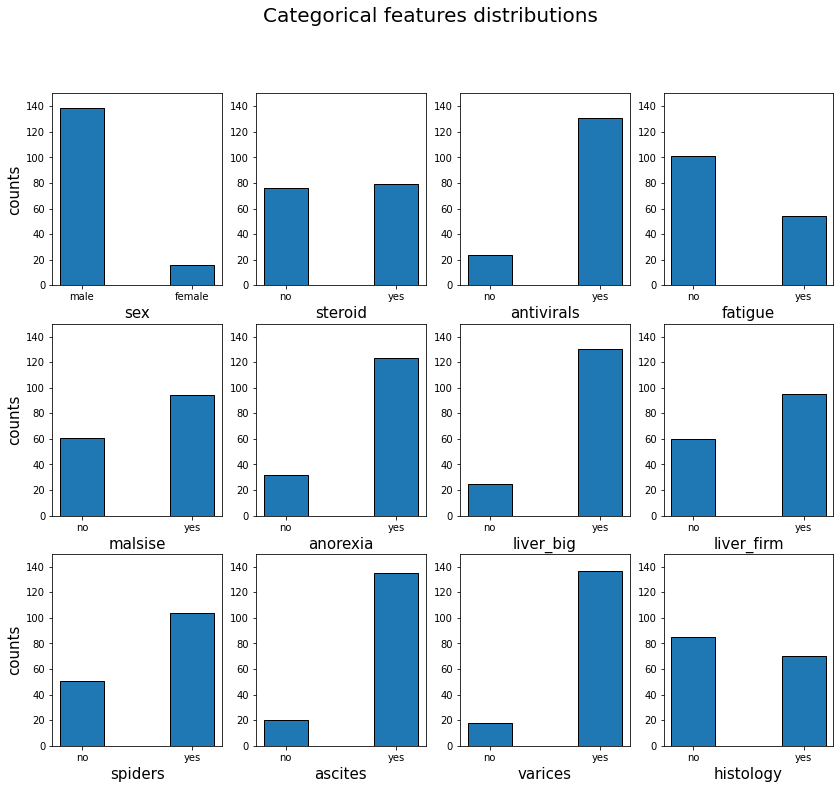

<Figure size 1440x720 with 0 Axes>

In [ ]:
# bar chart for sex features
# bar chart for sex features
# hepa['sex'].value_counts()
# hepa['steroid'].value_counts()
# hepa['antivirals'].value_counts()
# hepa['fatigue'].value_counts()
# hepa['malaise'].value_counts()
# hepa['anorexia'].value_counts()
# hepa['liver_big'].value_counts()
# hepa['liver_firm'].value_counts()
# hepa['spiders'].value_counts()
# hepa['ascites'].value_counts()
# hepa['varices'].value_counts()
# hepa['histology'].value_counts()

figure, axis = plt.subplots(3, 4, figsize=(14,12))
plt.figure(figsize=(20,10))

x1 = ['male', 'female']
y1 = [139, 16]
axis[0,0].bar(x1,y1, width=0.4, ec='black')
axis[0,0].set_xlabel('sex',fontsize=15)
axis[0,0].set_ylabel('counts',fontsize=15)
axis[0,0].set_ylim([0,150])

x2 = ['no', 'yes']
y2 = [76, 79]
axis[0,1].bar(x2,y2, width=0.4, ec='black')
axis[0,1].set_xlabel('steroid',fontsize=15)
axis[0,1].set_ylim([0,150])

y3 = [24, 131]
axis[0,2].bar(x2,y3, width=0.4, ec='black')
axis[0,2].set_xlabel('antivirals',fontsize=15)
axis[0,2].set_ylim([0,150])

y4 = [101, 54]
axis[0,3].bar(x2,y4, width=0.4, ec='black')
axis[0,3].set_xlabel('fatigue',fontsize=15)
axis[0,3].set_ylim([0,150])

y5 = [61, 94]
axis[1,0].bar(x2,y5, width=0.4, ec='black')
axis[1,0].set_xlabel('malsise',fontsize=15)
axis[1,0].set_ylabel('counts',fontsize=15)
axis[1,0].set_ylim([0,150])

y5 = [32, 123]
axis[1,1].bar(x2,y5, width=0.4, ec='black')
axis[1,1].set_xlabel('anorexia',fontsize=15)
axis[1,1].set_ylim([0,150])

y6 = [25, 130]
axis[1,2].bar(x2,y6, width=0.4, ec='black')
axis[1,2].set_xlabel('liver_big',fontsize=15)
axis[1,2].set_ylim([0,150])

y7 = [60, 95]
axis[1,3].bar(x2,y7, width=0.4, ec='black')
axis[1,3].set_xlabel('liver_firm',fontsize=15)
axis[1,3].set_ylim([0,150])

y8 = [51, 104]
axis[2,0].bar(x2,y8, width=0.4, ec='black')
axis[2,0].set_xlabel('spiders',fontsize=15)
axis[2,0].set_ylabel('counts',fontsize=15)
axis[2,0].set_ylim([0,150])

y9 = [20, 135]
axis[2,1].bar(x2,y9, width=0.4, ec='black')
axis[2,1].set_xlabel('ascites',fontsize=15)
axis[2,1].set_ylim([0,150])

y10 = [18, 137]
axis[2,2].bar(x2,y10, width=0.4, ec='black')
axis[2,2].set_xlabel('varices',fontsize=15)
axis[2,2].set_ylim([0,150])

y11 = [85, 70]
axis[2,3].bar(x2,y11, width=0.4, ec='black')
axis[2,3].set_xlabel('histology',fontsize=15)
axis[2,3].set_ylim([0,150])

figure.suptitle('Categorical features distributions', fontsize=20)
plt.tight_layout()


## Features selections

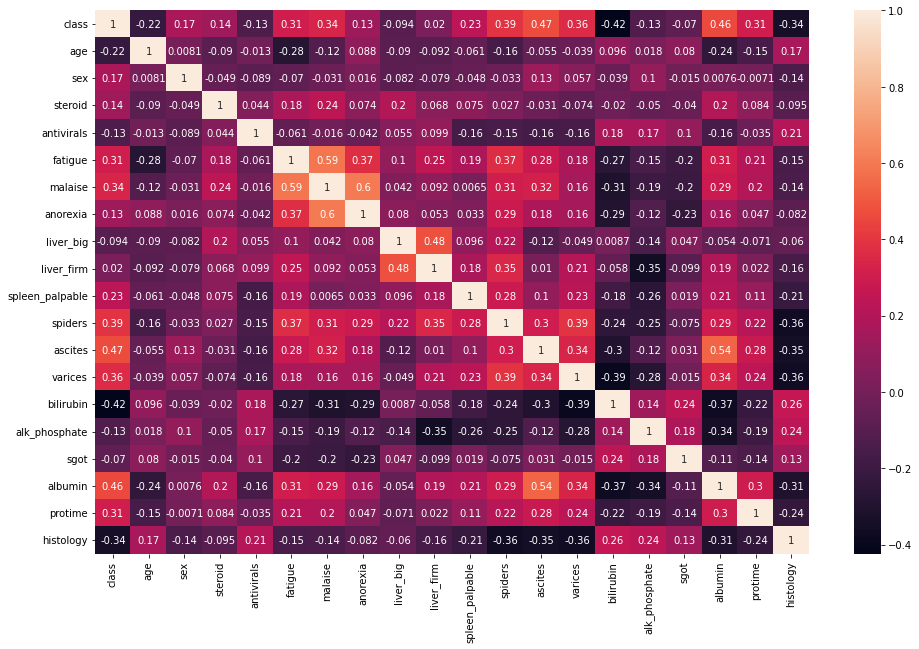

In [ ]:
hepa.corr() # Correlation
plt.figure(figsize=(16,10))
sns.heatmap(hepa.corr(), annot=True)
plt.show()


In [ ]:
class_corr = abs(hepa.corr()['class'])
class_corr.sort_values(ascending=False)


class              1.000000
ascites            0.469334
albumin            0.455927
bilirubin          0.424523
spiders            0.389137
varices            0.362385
malaise            0.339530
histology          0.337856
protime            0.307278
fatigue            0.306049
spleen_palpable    0.234261
age                0.219647
sex                0.173051
steroid            0.137413
anorexia           0.133638
antivirals         0.130196
alk_phosphate      0.125083
liver_big          0.093665
sgot               0.069572
liver_firm         0.020057
Name: class, dtype: float64

In [ ]:
hepa

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,30,1,0,1,1,1,1,0,1,1,1,1,1,1.0,85,18,4.0,61,0
1,1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,135,42,3.5,61,0
2,1,78,0,1,1,0,1,1,1,1,1,1,1,1,0.7,96,32,4.0,61,0
3,1,31,0,1,0,1,1,1,1,1,1,1,1,1,0.7,46,52,4.0,80,0
4,1,34,0,1,1,1,1,1,1,1,1,1,1,1,1.0,85,200,4.0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,0,1,1,0,0,0,1,1,1,0,0,0,7.6,85,242,3.3,50,1
151,1,44,0,1,1,0,1,1,1,0,1,1,1,1,0.9,126,142,4.3,61,1
152,1,61,0,0,1,0,0,1,0,0,1,0,1,1,0.8,75,20,4.1,61,1
153,1,53,1,0,1,0,1,1,1,1,0,0,1,0,1.5,81,19,4.1,48,1


# Diabetic Retinopathy Debrecen dataset

In [ ]:
mess = pd.read_csv('drive/MyDrive/COMP551p1/messidor_features.csv', header=None)
mess.columns = ['quality', 'prescreening', 'ma_level_a', 'ma_level_b', 'ma_level_c',
                "ma_level_d", 'ma_level_e', 'ma_level_f', 'exudate_level_a', 
                'exudate_level_b', 'exudate_level_c', 'exudate_level_d',
                'exudate_level_e', 'exudate_level_f', 'exudate_level_g','exudate_level_h', 
                'distance','diameter', 'amfm', 'class']
mess

,quality,prescreening,ma_level_a,ma_level_b,ma_level_c,ma_level_d,ma_level_e,ma_level_f,exudate_level_a,exudate_level_b,exudate_level_c,exudate_level_d,exudate_level_e,exudate_level_f,exudate_level_g,exudate_level_h,distance,diameter,amfm,class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


In [ ]:
mess.describe()

,quality,prescreening,ma_level_a,ma_level_b,ma_level_c,ma_level_d,ma_level_e,ma_level_f,exudate_level_a,exudate_level_b,exudate_level_c,exudate_level_d,exudate_level_e,exudate_level_f,exudate_level_g,exudate_level_h,distance,diameter,amfm,class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


## Label: Class

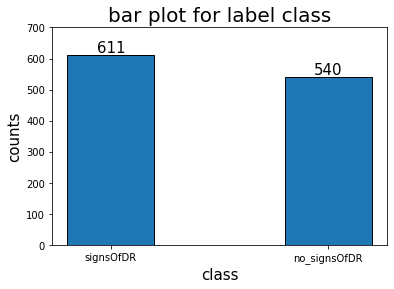

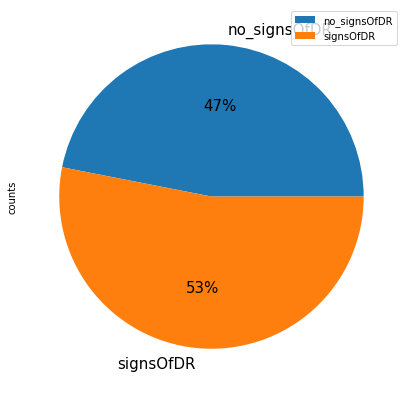

In [ ]:
# bar chart
mess['class'].value_counts()
mess_class_df = pd.DataFrame({'class':['signsOfDR', 'no_signsOfDR'], 'counts':[611, 540]})
x_m = ['signsOfDR', 'no_signsOfDR']
y_m = [611, 540]
plt.bar(x_m,y_m, width=0.4, ec='black')
plt.xlabel('class', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.text(0, y_m[0], 611, ha='center', va='bottom', fontsize=15)
plt.text(1,y_m[1], 540, ha='center', va='bottom', fontsize=15)
plt.ylim([0,700])
plt.title('bar plot for label class', fontsize=20)
# pie chart
mess_class_df.groupby(['class']).sum().plot(kind='pie', y='counts', 
                                       autopct='%1.0f%%', figsize=(9,7), fontsize=15)

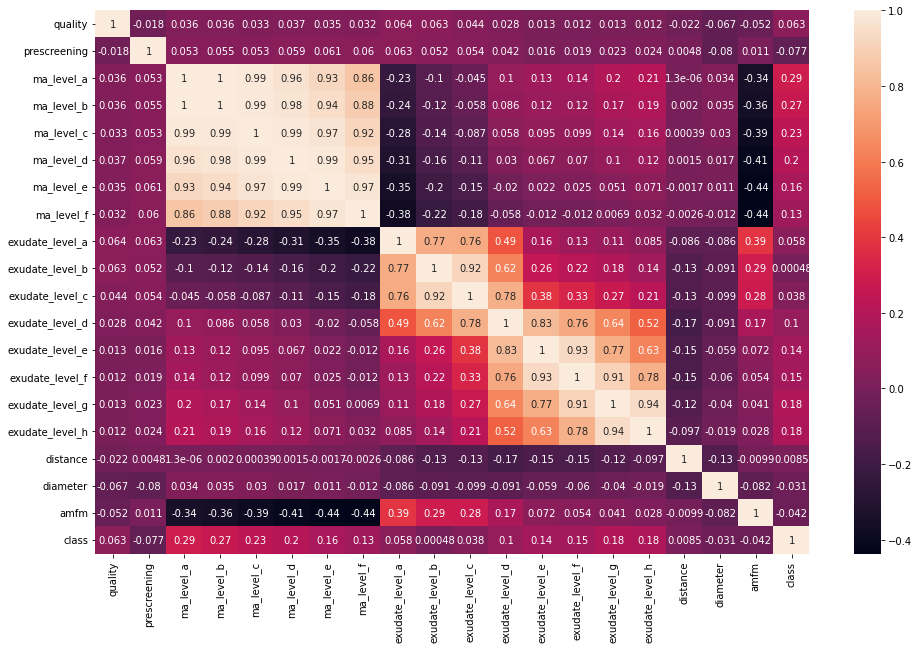

In [ ]:
mess.corr()
plt.figure(figsize=(16,10))
sns.heatmap(mess.corr(), annot=True)
plt.show()


In [ ]:
classlabel_corr = abs(mess.corr()['class'])
classlabel_corr.sort_values(ascending=False)


class              1.000000
ma_level_a         0.292603
ma_level_b         0.266338
ma_level_c         0.234691
ma_level_d         0.197511
exudate_level_g    0.184772
exudate_level_h    0.177313
ma_level_e         0.161631
exudate_level_f    0.151424
exudate_level_e    0.142273
ma_level_f         0.127861
exudate_level_d    0.104254
prescreening       0.076925
quality            0.062816
exudate_level_a    0.058015
amfm               0.042144
exudate_level_c    0.038281
diameter           0.030868
distance           0.008466
exudate_level_b    0.000479
Name: class, dtype: float64

# Task 2&3: Implement the models and Run experiments

#KNN


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns;
#the output of plotting commands is displayed inline within frontends
%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 

#np.random.seed(43)
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= manhattan):
        self.dist_fn = dist_fn                                                    
        self.K = K
        return
    
    def fit(self, x, y, dist_fn= manhattan):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        
        num_test = x_test.shape[0]
                
        if (self.dist_fn == manhattan or self.dist_fn == euclidean) :
          distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        else :
          distances = self.dist_fn(self.x[:,:], x_test[:,:])
        #print(distances.shape)
        knns = np.zeros((num_test, self.K), dtype=int)
        
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]  
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)
        y_prob /= self.K                                                        
        return y_prob, knns
    def evaluate_acc(self, y_true, y_tar) :
        accuracy = np.sum(y_true == y_tar)/y_tar.shape[0]
        return accuracy

    def draw_decision_boundary (self, x_lable, y_lable) :
        
        x0v = np.linspace(np.min(self.x[:,0]), np.max(self.x[:,0]), 200)
        x1v = np.linspace(np.min(self.x[:,1]), np.max(self.x[:,1]), 200)
        #x2v = np.linspace(np.min(self.x[:,2]), np.max(self.x[:,2]), 200)

        #to features values as a mesh  
        #x0, x1, x2 = np.meshgrid(x0v, x1v, x2v)
        x0, x1 = np.meshgrid(x0v, x1v)
        x_all = np.vstack((x0.ravel(),x1.ravel())).T

        for k in range(1,9,2):
          model = KNN(K=k)

          y_train_prob = np.zeros((self.y.shape[0], self.C + 1))
          y_train_prob[np.arange(self.y.shape[0]), self.y] = 1
          #print(self.x, y_train_prob)
          #to get class probability of all the points in the 2D grid
          y_prob_all, _ = model.fit(self.x, self.y).predict(x_all)
          y_prob_all_draw = np.zeros((y_prob_all.shape[0], self.C + 1))
          
          for i in range(y_prob_all.shape[0]) :
            y_prob_all_draw [i,0:2] = y_prob_all[i,0:2]

          #print(y_prob_all_draw)
          #y_pred_all = np.zeros_like(y_prob_all)
          #y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

          plt.scatter(self.x[:,0], self.x[:,1], c=y_train_prob, marker='o', alpha=1)
          plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_draw, marker='.', alpha=0.01)
          plt.ylabel(y_lable)
          plt.xlabel(x_lable)
          plt.show()
        
        return



##Hepatitis dataset

instances (N) 	 155 
 features (D) 	 2 
 classes (C) 	 2


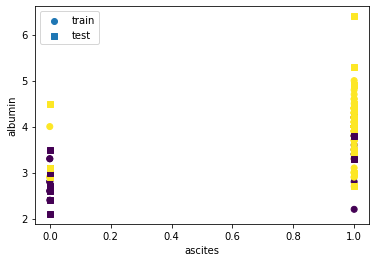

In [ ]:
x, y = pd.DataFrame(hepa[['ascites', 'albumin']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]

#print (x, y)ascites albumin

(N,D), C = x.shape, np.max(y)+1                                                    #np.max(y)+1 because y has 1,2 as values but we need to show that there are 3 classes so,
                                                                                    #np.max(y) = 2 and np.max(y)+1 = 3
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

np.random.seed(12)
inds = np.random.permutation(N)                                                     #generates an indices array from 0 to N-1 and permutes it 
#order needs to be shuffled else we would Always get only two classes.

#split the dataset into train and test
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]


#visualization of the data
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.show()

knns shape: (55, 3)
y_prob shape: (55, 2)
accuracy is 89.1.


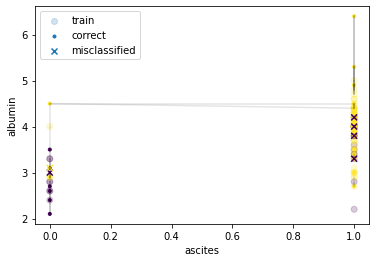

In [ ]:
model = KNN(K=3)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
#accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
#print(y_pred)
#print(f'accuracy is {accuracy*100:.1f}.')

print(f'accuracy is {model.evaluate_acc(y_test, y_pred)*100:.1f}.') 

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('albumin')
plt.xlabel('ascites')
plt.legend()
plt.show()

Decisoin Boundary

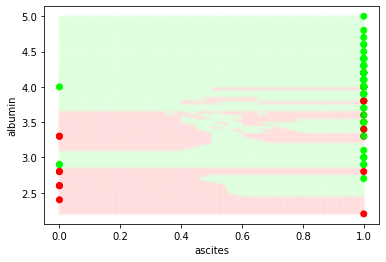

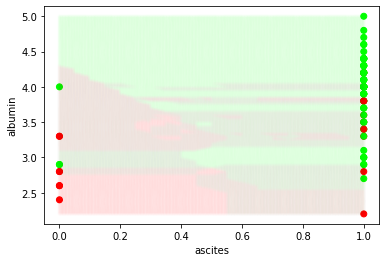

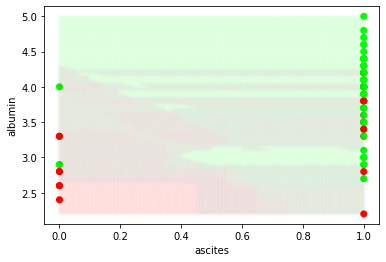

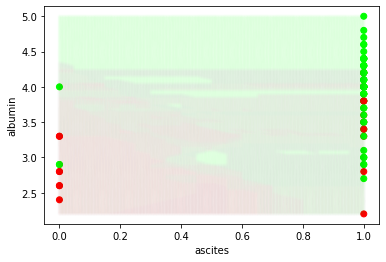

In [ ]:
model.draw_decision_boundary('ascites', 'albumin')

## Diabetic Retinopathy Debrecen dataset

instances (N) 	 1151 
 features (D) 	 2 
 classes (C) 	 2


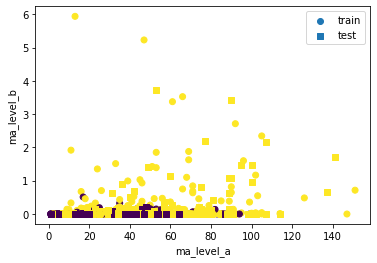

In [ ]:
x, y = pd.DataFrame(mess[['ma_level_a', 'exudate_level_g']]).to_numpy(), pd.DataFrame(mess[['class']]).to_numpy().T[0]

#print (x, y)ascites albumin

(N,D), C = x.shape, np.max(y)+1                                                    #np.max(y)+1 because y has 1,2 as values but we need to show that there are 3 classes so,
                                                                                    #np.max(y) = 2 and np.max(y)+1 = 3
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

np.random.seed(1)
inds = np.random.permutation(N)                                                     #generates an indices array from 0 to N-1 and permutes it 
#order needs to be shuffled else we would Always get only two classes.

#split the dataset into train and test
x_train, y_train = x[inds[:820]], y[inds[:820]]
x_test, y_test = x[inds[820:]], y[inds[820:]]


#visualization of the data
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('ma_level_b')
plt.xlabel('ma_level_a')
plt.show()

knns shape: (331, 3)
y_prob shape: (331, 2)
accuracy is 60.7.


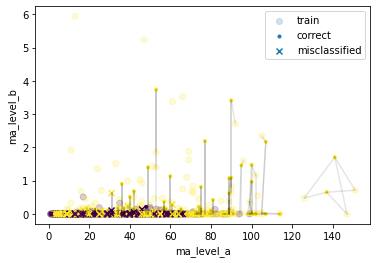

In [ ]:
model = KNN(K=3)

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
#accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
#print(y_pred)
#print(f'accuracy is {accuracy*100:.1f}.')

print(f'accuracy is {model.evaluate_acc(y_test, y_pred)*100:.1f}.') 

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('ma_level_b')
plt.xlabel('ma_level_a')
plt.legend()
plt.show()

Decisoin Boundary

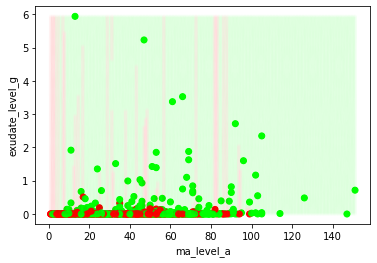

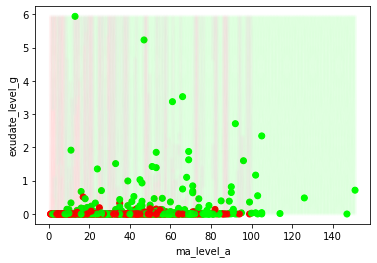

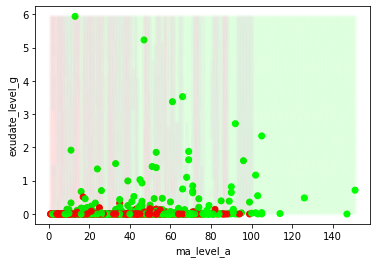

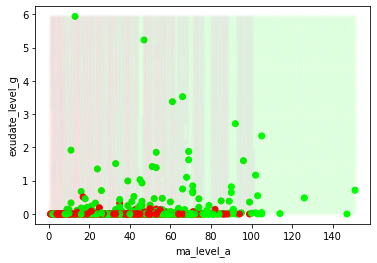

In [ ]:
model.draw_decision_boundary('ma_level_a', 'exudate_level_g')

Different K for two func

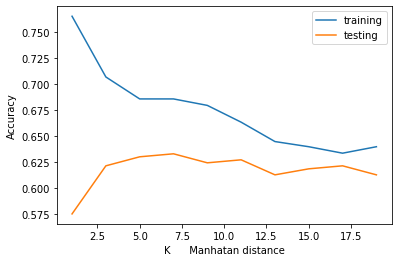

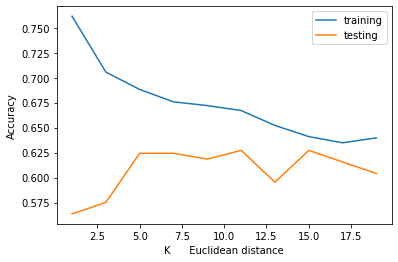

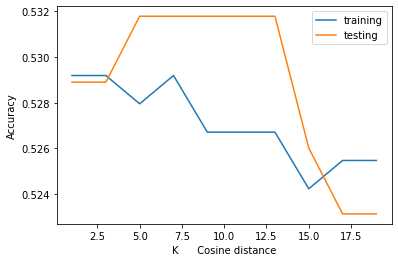

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)
trainAc=np.array([])
testAc=np.array([])
x_coordinate = list(range(1,20,2))
for i in x_coordinate:
  model = KNN(i)
  y_prob, knns = model.fit(x_train, y_train).predict(x_train)
  y_pred = np.argmax(y_prob,axis=-1)
  trainAc = np.append(trainAc,model.evaluate_acc(y_train,y_pred))
  y_prob, _ = model.predict(x_test)
  y_pred = np.argmax(y_prob,axis=-1)
  testAc = np.append(testAc,model.evaluate_acc(y_test,y_pred))

plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('K      Manhatan distance')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.show()
trainAc=np.array([])
testAc=np.array([])
for i in x_coordinate:
  model = KNN(i, euclidean)
  y_prob, knns = model.fit(x_train, y_train).predict(x_train)
  y_pred = np.argmax(y_prob,axis=-1)
  trainAc = np.append(trainAc,model.evaluate_acc(y_train,y_pred))
  y_prob, _ = model.predict(x_test)
  y_pred = np.argmax(y_prob,axis=-1)
  testAc = np.append(testAc,model.evaluate_acc(y_test,y_pred))


plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('K      Euclidean distance')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.show()

#cosine = lambda x1, x2: (np.dot(x1, x2,axis=-1) / (np.sqrt(np.dot(x1, x1, axis=-1)) * np.sqrt(np.dot(x2, x2, axis = -1))))
def cosine (x1, x2):
  #cnt = 0
  #x1 = x1[0,:,:], x2 = x2[:,0,:]
  dis = np.zeros(shape = (x1.shape[0],x2.shape[0]))
  #print(dis.shape)
  for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
      x, y = x1[i], x2[j]
    #  print(x, y)
      dis[i][j] = (np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y,y))))
  #print(dis.length)
  return dis

trainAc=np.array([])
testAc=np.array([])
for i in x_coordinate:
  model = KNN(i, cosine)
  y_prob, knns = model.fit(x_train, y_train).predict(x_train)
  y_pred = np.argmax(y_prob,axis=-1)
  trainAc = np.append(trainAc,model.evaluate_acc(y_train,y_pred))
  y_prob, _ = model.predict(x_test)
  y_pred = np.argmax(y_prob,axis=-1)
  testAc = np.append(testAc,model.evaluate_acc(y_test,y_pred))


plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('K      Cosine distance')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.show()


# Decision Tree Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
np.random.seed(1234)


class Node:
    def __init__(self,data_indices,parent):
        self.data_indices = data_indices
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        if parent:
            self.depth = parent.depth+1
            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices],minlength = self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)
            

#greedy test
def greedy_test(node,cost_fn):
    best_cost = np.inf
    best_feature = None
    best_value = None
    num_instance, num_features = node.data.shape
    
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1])/2
    
    for f in range(num_features):
        data_f = node.data[node.data_indices,f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f<=test]
            right_indices = node.data_indices[data_f>test]
            
            if len(left_indices)==0 or len(right_indices)==0:
                continue
            
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            
            num_left,num_right = left_indices.shape[0], right_indices.shape[0]
            
            cost = (num_left*left_cost + num_right*right_cost)/num_instances
            
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

#Cost Functions
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts/ np.sum(counts)
    
    return 1- np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs>0]
    return -np.sum(class_probs * np.log(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1- np.sum(np.square(class_probs))


#Decision Trees
class DecisionTree:
    def __init__(self,num_classes=None, max_depth = 3,cost_fn = cost_misclassification,min_leaf_instance =1):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instance = min_leaf_instance
        
    def fit(self, data, labels):
        pass
    def predict(self,data_test):
        pass
    
    
def fit(self,data,labels):
    self.data = data
    self.labels = labels
    
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    
    self.root = Node(np.arange(data.shape[0]),None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #fit the tree recursively
    self._fit_tree(self.root)
    return self

def _fit_tree(self,node):
    if node.depth ==self.max_depth or len(node.data_indices)<=self.min_leaf_instance:
        return
    cost, split_feature,split_value = greedy_test(node,self.cost_fn)
    
    if np.isinf(cost):
        return
    
    test = node.data[node.data_indices,split_feature] <= split_value
    node.split_feature = split_feature
    node.split_value = split_value
    
    left = Node(node.data_indices[test],node)
    right = Node(node.data_indices[np.logical_not(test)],node)
    
    #recursive calls to fit a tree
    self._fit_tree(left)
    self._fit_tree(right)
    
    node.left= left
    node.right = right
    
DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self,data_test):
    class_probs = np.zeros((data_test.shape[0],self.num_classes))
    
    for n, x in enumerate(data_test):
        node = self.root
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
                class_probs[n,:] = node.class_prob
    return class_probs
DecisionTree.predict = predict


Related Functions

In [ ]:
def evalTestAc(x_train,y_train,x_test,y_test,tree):
  treeFit = tree.fit(x_train,y_train)
  probs_test = treeFit.predict(x_test)
  y_predict = np.argmax(probs_test,1)
  accuracy= np.sum(y_predict==y_test)/y_test.shape[0]
  return accuracy


def evalTrainAc(x_train,y_train,x_test,y_test,tree):
  treeFit = tree.fit(x_train,y_train)
  probs_test = treeFit.predict(x_train)
  y_predict = np.argmax(probs_test,1)
  accuracy= np.sum(y_predict==y_train)/x_train.shape[0]
  return accuracy

def plot(x_train,y_train,x_test,y_test,tree,xLabel,yLabel):
  treeFit = tree.fit(x_train,y_train)
  probs_test = treeFit.predict(x_test)
  y_predict = np.argmax(probs_test,1)
  correct = y_test==y_predict
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,marker='o',alpha  = 0.2,label='train')
  plt.scatter(x_test[correct,0],x_test[correct,1],c=y_predict[correct],marker='.',label='correct')
  plt.scatter(x_test[incorrect,0],x_test[incorrect,1],c=y_predict[incorrect],marker='x',label='incorrect')
  plt.legend()
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.show()


def drawBoundary(x_train,y_train,num_classes1,model,xLabel,yLabel):
  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
  x0,x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T
  y_train_prob = np.zeros((y_train.shape[0], num_classes1 + 1))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  y_prob_all = model.fit(x_train, y_train).predict(x_all)
  y_prob_all_draw = np.zeros((y_prob_all.shape[0], num_classes1 + 1))
  for i in range(y_prob_all.shape[0]) :
      y_prob_all_draw [i,0:2] = y_prob_all[i,0:2]
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_draw, marker='.', alpha=.01)
  plt.ylabel(yLabel)
  plt.xlabel(xLabel)
  plt.show()



## Hepatitis dataset

Splitting Datasets

In [ ]:
from sklearn.model_selection import train_test_split
x,y = pd.DataFrame(hepa[['ascites','albumin']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)
(num_instances,num_features),num_classes1 = x.shape, int(np.max(y)+1)

Cross Validation Functions

In [ ]:


from sklearn.model_selection import StratifiedKFold
def K_fold_tree(tree,k,x_train,y_train):
  kf = StratifiedKFold(n_splits=k)
  sum=0;
  for train_index, test_index in kf.split(x_train,y_train):
    x_train1,x_test1,y_train1,y_test1 = x_train[train_index], x_train[test_index], y_train[train_index], y_train[test_index]
    Accuracy = evalTestAc(x_train1,y_train1,x_test1,y_test1,tree)
    sum = sum+Accuracy
  return (sum/k)


def cross_validation(cost_fn1,max_depth,x_train,y_train):
  bestAcc = 0
  bestHyper = max_depth
  for i in range(max_depth):
    tree = DecisionTree(max_depth=i+1,cost_fn=cost_fn1)
    validationAcc = K_fold_tree(tree,10,x_train,y_train)
    if(bestAcc<validationAcc):
      bestAcc = validationAcc
      bestHyper = i+1
  return bestHyper
  


Plot the graph and show the decision boundary with best hyperparameter

In [ ]:
cross_validation(cost_entropy,10,x_train,y_train)

6


Cost Function:Entropy:


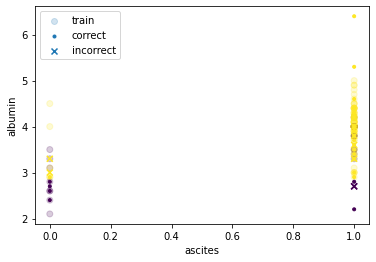

Testing accuracy is 80.9.

Decision Boundary:


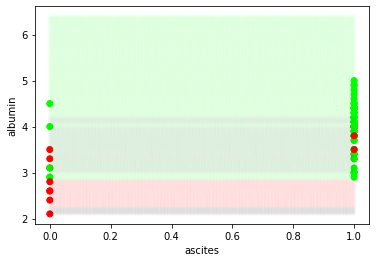

In [ ]:
print('\nCost Function:Entropy:')
treeEntropy = DecisionTree(max_depth=4,cost_fn = cost_entropy)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeEntropy)
plot(x_train,y_train,x_test,y_test,treeEntropy,'ascites', 'albumin')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeEntropy,'ascites', 'albumin')


In [ ]:
cross_validation(cost_gini_index,10,x_train,y_train)

5


Cost Function:Gini Index:


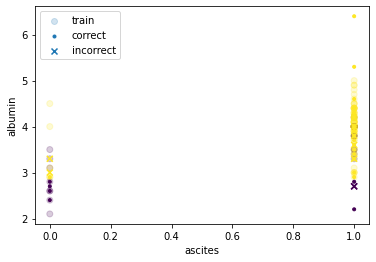

Testing accuracy is 80.9.

Decision Boundary:


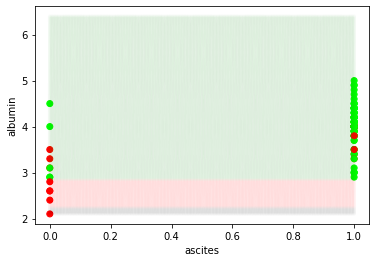

In [ ]:
print('\nCost Function:Gini Index:')
treeGini = DecisionTree(max_depth=2,cost_fn = cost_gini_index)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeGini)
plot(x_train,y_train,x_test,y_test,treeGini,'ascites', 'albumin')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeGini,'ascites', 'albumin')


In [ ]:
cross_validation(cost_misclassification,10,x_train,y_train)

1


Cost Function:Missclassifition Cost:


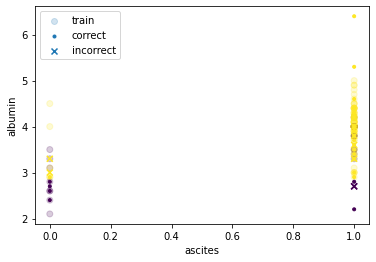

Testing accuracy is 80.9.

Decision Boundary:


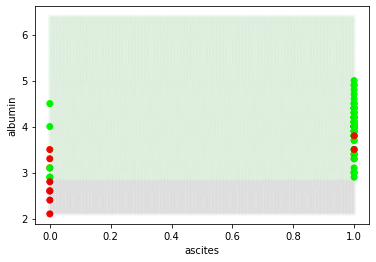

In [ ]:
print('\nCost Function:Missclassifition Cost:')
treeMiss = DecisionTree(max_depth=1,cost_fn = cost_misclassification)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeMiss)
plot(x_train,y_train,x_test,y_test,treeMiss,'ascites', 'albumin')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeMiss,'ascites', 'albumin')

**Controlled Experiment**



Comparison Between Different Max_Depth with Different Cost Function

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

(0.5, 1.0)

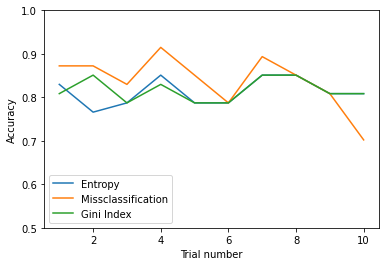

In [ ]:
accEntropy = np.array([])
accMiss = np.array([])
accGini = np.array([])
x_coordinate = list(range(1,11))
for i in x_coordinate:
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)
  treeMiss = DecisionTree(max_depth=5)
  treeEntropy = DecisionTree(max_depth=6,cost_fn = cost_entropy)
  treeGini = DecisionTree(max_depth=5,cost_fn = cost_gini_index)
  accMiss = np.append(accMiss,evalTestAc(x_train,y_train,x_test,y_test,treeMiss))
  accEntropy = np.append(accEntropy,evalTestAc(x_train,y_train,x_test,y_test,treeEntropy))
  accGini = np.append(accGini,evalTestAc(x_train,y_train,x_test,y_test,treeGini))

plt.plot(x_coordinate, accEntropy)
plt.plot(x_coordinate, accMiss)
plt.plot(x_coordinate, accGini)
plt.xlabel('Trial number')
plt.ylabel('Accuracy')
plt.legend(['Entropy', 'Missclassification', 'Gini Index'])
plt.ylim(0.5,1)

Entropy Cost

(0.7, 1.0)

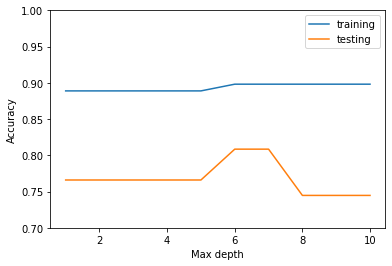

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(10):
  treeEntropy = DecisionTree(max_depth=i+1,cost_fn = cost_entropy)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeEntropy))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeEntropy))

x_coordinate = list(range(1,11))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.7,1)

Missclassification Cost

(0.7, 1.0)

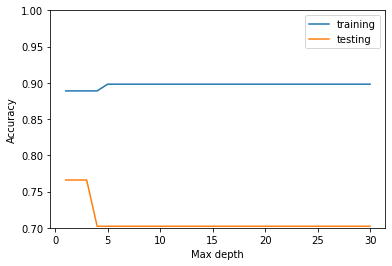

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(30):
  treeMiss = DecisionTree(max_depth=i+1)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeMiss))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeMiss))
x_coordinate = list(range(1,31))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.7,1)

Gini Index

(0.7, 1.0)

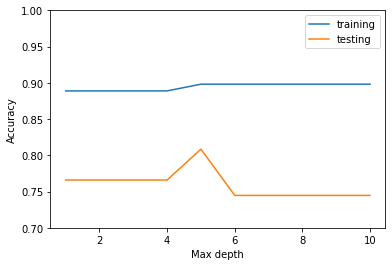

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(10):
  treeGini = DecisionTree(max_depth=i+1,cost_fn = cost_gini_index)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeGini))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeGini))
x_coordinate = list(range(1,11))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.7,1)

Multiple Feature Test

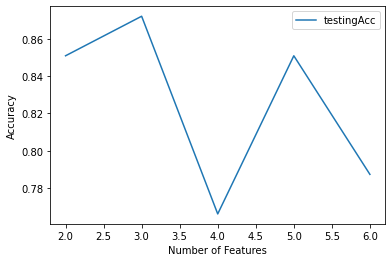

In [ ]:
from sklearn.model_selection import train_test_split
AccTree = np.array([])
#AccKnn = np.array([])
x,y = pd.DataFrame(hepa[['ascites','albumin']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#cross validation 
ct = cross_validation(cost_entropy,10,x_train,y_train)
#ck = cross_validation_knn(10,x_train,y_train)
treeTwoF = DecisionTree(max_depth = ct,cost_fn = cost_entropy)
AccTree = np.append(AccTree,evalTestAc(x_train,y_train,x_test,y_test,treeTwoF))

x,y = pd.DataFrame(hepa[['ascites','albumin','fatigue']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ct = cross_validation(cost_entropy,10,x_train,y_train)

treeThreeF = DecisionTree(max_depth = ct,cost_fn = cost_entropy)
AccTree = np.append(AccTree,evalTestAc(x_train,y_train,x_test,y_test,treeThreeF))

x,y = pd.DataFrame(hepa[['ascites','albumin','fatigue','spiders']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ct = cross_validation(cost_entropy,10,x_train,y_train)

treeFourF = DecisionTree(max_depth = ct,cost_fn = cost_entropy)
AccTree = np.append(AccTree,evalTestAc(x_train,y_train,x_test,y_test,treeFourF))

x,y = pd.DataFrame(hepa[['ascites','albumin','fatigue','spiders','varices']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ct = cross_validation(cost_entropy,10,x_train,y_train)

treeFiveF = DecisionTree(max_depth = ct,cost_fn = cost_entropy)
AccTree = np.append(AccTree,evalTestAc(x_train,y_train,x_test,y_test,treeFiveF))

x,y = pd.DataFrame(hepa[['ascites','albumin','fatigue','spiders','varices','protime']]).to_numpy(), pd.DataFrame(hepa[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ct = cross_validation(cost_entropy,10,x_train,y_train)

tree6F = DecisionTree(max_depth = ct,cost_fn = cost_entropy)
AccTree = np.append(AccTree,evalTestAc(x_train,y_train,x_test,y_test,tree6F))

x_coor = list(range(2,7))
plt.plot(x_coor,AccTree)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(['testingAcc'])
plt.show()

 Diabetic Retinopathy Debrecen dataset


In [ ]:
from sklearn.model_selection import train_test_split
x, y = pd.DataFrame(mess[['ma_level_a', 'exudate_level_g']]).to_numpy(), pd.DataFrame(mess[['class']]).to_numpy().T[0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
(num_instances,num_features),num_classes1 = x.shape, int(np.max(y)+1)


In [ ]:
cross_validation(cost_entropy,10,x_train,y_train)

#cross_validation(cost_misclassification,30)

2


Cost Function:Entropy:


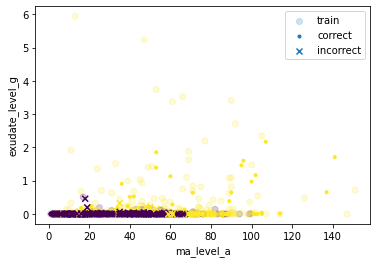

Testing accuracy is 61.6.

Decision Boundary:


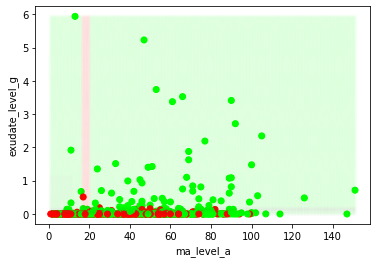

In [ ]:
print('\nCost Function:Entropy:')
treeEntropy = DecisionTree(max_depth=6,cost_fn = cost_entropy)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeEntropy)
plot(x_train,y_train,x_test,y_test,treeEntropy,'ma_level_a', 'exudate_level_g')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeEntropy,'ma_level_a', 'exudate_level_g')


In [ ]:
cross_validation(cost_gini_index,10,x_train,y_train)

2


Cost Function:Gini Index:


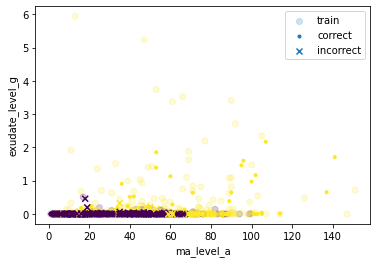

Testing accuracy is 61.6.

Decision Boundary:


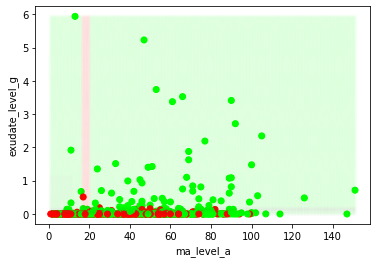

In [ ]:
print('\nCost Function:Gini Index:')
treeGini = DecisionTree(max_depth=6,cost_fn = cost_entropy)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeEntropy)
plot(x_train,y_train,x_test,y_test,treeEntropy,'ma_level_a', 'exudate_level_g')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeGini,'ma_level_a', 'exudate_level_g')

In [ ]:
cross_validation(cost_misclassification,10,x_train,y_train)

5


Cost Function:Missclasification:


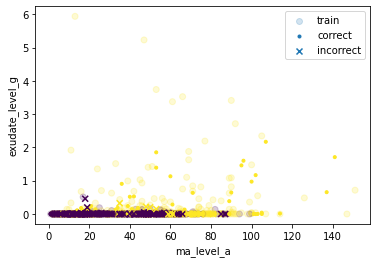

Testing accuracy is 62.1.

Decision Boundary:


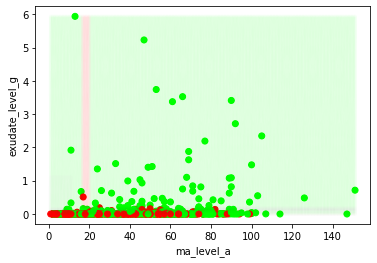

In [ ]:
print('\nCost Function:Missclasification:')
treeEntropy = DecisionTree(max_depth=7,cost_fn = cost_entropy)
accuracy = evalTestAc(x_train,y_train,x_test,y_test,treeEntropy)
plot(x_train,y_train,x_test,y_test,treeEntropy,'ma_level_a', 'exudate_level_g')
print(f'Testing accuracy is {accuracy*100:.1f}.')
print('\nDecision Boundary:')
drawBoundary(x_train,y_train,num_classes1,treeEntropy,'ma_level_a', 'exudate_level_g')

(0.5, 1.0)

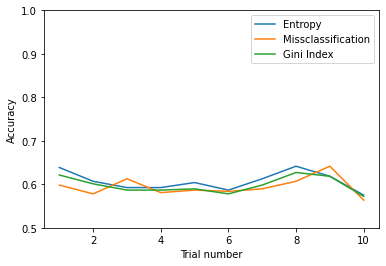

In [ ]:
accEntropy = np.array([])
accMiss = np.array([])
accGini = np.array([])
x_coordinate = list(range(1,11))
for i in x_coordinate:
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)
  treeMiss = DecisionTree(max_depth=20)
  treeEntropy = DecisionTree(max_depth=20,cost_fn = cost_entropy)
  treeGini = DecisionTree(max_depth=20,cost_fn = cost_gini_index)
  accMiss = np.append(accMiss,evalTestAc(x_train,y_train,x_test,y_test,treeMiss))
  accEntropy = np.append(accEntropy,evalTestAc(x_train,y_train,x_test,y_test,treeEntropy))
  accGini = np.append(accGini,evalTestAc(x_train,y_train,x_test,y_test,treeGini))

plt.plot(x_coordinate, accEntropy)
plt.plot(x_coordinate, accMiss)
plt.plot(x_coordinate, accGini)
plt.xlabel('Trial number')
plt.ylabel('Accuracy')
plt.legend(['Entropy', 'Missclassification', 'Gini Index'])
plt.ylim(0.5,1)

(0.4, 1.0)

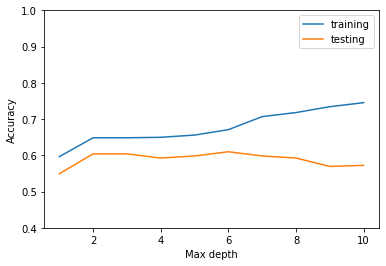

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(10):
  treeEntropy = DecisionTree(max_depth=i+1,cost_fn = cost_entropy)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeEntropy))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeEntropy))

x_coordinate = list(range(1,11))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.4,1)

(0.4, 1.0)

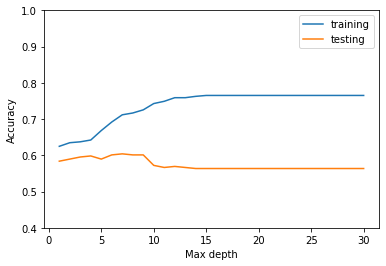

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(30):
  treeMiss = DecisionTree(max_depth=i+1)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeMiss))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeMiss))
x_coordinate = list(range(1,31))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.4,1)

(0.4, 1.0)

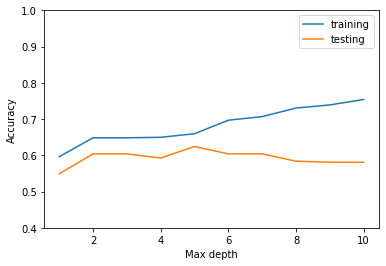

In [ ]:
trainAc=np.array([])
testAc=np.array([])
for i in range(10):
  treeGini = DecisionTree(max_depth=i+1,cost_fn = cost_gini_index)
  trainAc = np.append(trainAc,evalTrainAc(x_train,y_train,x_test,y_test,treeGini))
  testAc = np.append(testAc,evalTestAc(x_train,y_train,x_test,y_test,treeGini))
x_coordinate = list(range(1,11))
plt.plot(x_coordinate, trainAc)
plt.plot(x_coordinate, testAc)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(['training', 'testing'])
plt.ylim(0.4,1)